Using backend: tensorflow.compat.v1

2021-12-12 18:28:24.085392: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0003 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0086 seconds


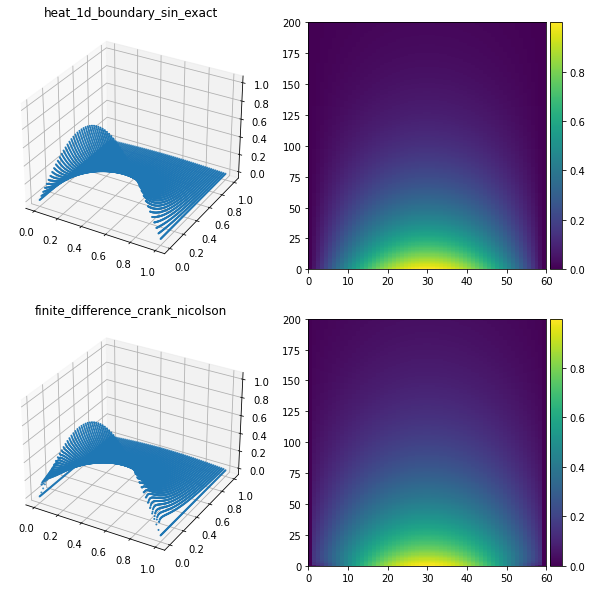

In [1]:
from heat_pinn import *
from project.gen_data import create_xt_grids, gen_solution

TIMER_REPEAT_TIMES = 25

@dataclass
class QuantPinnConstParam(PinnConstParam):
    mean_abs_error_threshold = 0.01
    def __str__(self) -> str:
        rs = super().__str__()
        rs = rs + "mean_abs_error_threshold: {}".format(self.mean_abs_error_threshold)
        return rs

def get_above_threshold(mae_dist_model, threshold):
    filtered = [m for m in mae_dist_model if m[1] >= threshold]
    if len(filtered) == 0:
        return None
    min_mae_dist_model = min(filtered, key=lambda x: float(x[1]))
    return min_mae_dist_model

# Generate constants throughout this app!!
const_params = QuantPinnConstParam()

solve_analytical_and_numerical(const_params)

plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)

In [12]:
hidden_layers = [3, 2, 1]
hidden_layer_sizes = [20, 15, 10, 5, 3]

# # Small test
# hidden_layers = [3]
# hidden_layer_sizes = [20, 15]

plot_results = []
mae_dist_models = []
for layer in hidden_layers:
    size_maes = []
    for size in hidden_layer_sizes:
        test_params = PinnTestParam()
        test_params.nn_hidden_layer_num = layer
        test_params.nn_hidden_layer_size = size
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        size_maes.append(mae)
    plot_results.append([layer, hidden_layer_sizes, size_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.032217 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.473098 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.72e-03, 3.20e-02, 3.37e-01]    [4.77e-03, 3.20e-02, 3.37e-01]    []  
1000      [4.87e-04, 1.13e-04, 7.84e-05]    [2.26e-04, 1.13e-04, 7.84e-05]    []  
2000      [2.03e-04, 3.93e-05, 2.85e-05]    [1.25e-04, 3.93e-05, 2.85e-05]    []  
3000      [9.56e-05, 1.20e-05, 9.05e-06]    [5.35e-05, 1.20e-05, 9.05e-06]    []  
4000      [4.20e-05, 4.56e-06, 2.60e-06]    [2.64e-05, 4.56e-06, 2.60e-06]    []  
5000      [2.55e-05, 2.96e-06, 1.48e-06]    [1.82e-05, 2.96e-06, 1.48e-06]    []  
6000      [1.93e-05, 2.23e-06, 1.15e-06]    [1.46e-05, 2.23e-06, 1.15e-06]    []  
7000      [1.69e-05, 2.12e-06, 1.20e-06]    [1.26e-05, 2.12e-06, 1.20e-06]    []  
8000      [1.40e-05, 1.39e-06, 7.45e-07]    [1.08e-05, 1.39e-06, 7.45e-07]    []  
9000      [1.24e-05, 1.15e-06, 6.00e-07]    [9.50e-06, 1.15e-06, 6.00e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.488941 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.79e-01, 2.92e-01, 2.15e-01]    [1.71e-01, 2.92e-01, 2.15e-01]    []  
1000      [4.26e-03, 1.81e-03, 2.64e-03]    [2.96e-03, 1.81e-03, 2.64e-03]    []  
2000      [1.90e-04, 4.22e-05, 1.89e-05]    [1.41e-04, 4.22e-05, 1.89e-05]    []  
3000      [7.85e-05, 1.19e-05, 1.02e-05]    [7.02e-05, 1.19e-05, 1.02e-05]    []  
4000      [4.67e-05, 5.86e-06, 1.01e-06]    [4.17e-05, 5.86e-06, 1.01e-06]    []  
5000      [4.17e-05, 1.32e-05, 9.27e-06]    [3.82e-05, 1.32e-05, 9.27e-06]    []  
6000      [2.22e-05, 4.97e-06, 5.97e-07]    [1.85e-05, 4.97e-06, 5.97e-07]    []  
7000      [1.64e-05, 4.39e-06, 4.22e-07]    [1.32e-05, 4.39e-06, 4.22e-07]    []  
8000      [1.56e-05, 1.98e-05, 2.02e-05]    [1.22e-05, 1.98e-05, 2.02e-05]    []  
9000      [1.01e-05, 3.42e-06, 3.11e-07]    [7.70e-06, 3.42e-06, 3.11e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.516423 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.37e-01, 5.96e-02, 4.45e-01]    [1.23e-01, 5.96e-02, 4.45e-01]    []  
1000      [3.83e-03, 4.38e-03, 4.25e-03]    [2.28e-03, 4.38e-03, 4.25e-03]    []  
2000      [1.20e-03, 2.01e-04, 2.67e-04]    [6.67e-04, 2.01e-04, 2.67e-04]    []  
3000      [5.64e-04, 7.49e-05, 6.12e-05]    [3.73e-04, 7.49e-05, 6.12e-05]    []  
4000      [3.47e-04, 6.42e-05, 4.10e-05]    [2.34e-04, 6.42e-05, 4.10e-05]    []  
5000      [2.36e-04, 4.73e-05, 3.12e-05]    [1.60e-04, 4.73e-05, 3.12e-05]    []  
6000      [1.70e-04, 3.36e-05, 2.32e-05]    [1.13e-04, 3.36e-05, 2.32e-05]    []  
7000      [1.26e-04, 2.50e-05, 1.81e-05]    [8.45e-05, 2.50e-05, 1.81e-05]    []  
8000      [1.00e-04, 2.06e-05, 1.47e-05]    [6.73e-05, 2.06e-05, 1.47e-05]    []  
9000      [8.25e-05, 1.76e-05, 1.24e-05]    [5.75e-05, 1.76e-05, 1.24e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.516973 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.49e-01, 5.04e-01, 1.22e-01]    [7.54e-01, 5.04e-01, 1.22e-01]    []  
1000      [1.25e-02, 2.95e-02, 5.40e-02]    [1.07e-02, 2.95e-02, 5.40e-02]    []  
2000      [1.14e-02, 5.93e-03, 1.15e-02]    [8.55e-03, 5.93e-03, 1.15e-02]    []  
3000      [3.90e-03, 1.34e-03, 8.08e-04]    [2.27e-03, 1.34e-03, 8.08e-04]    []  
4000      [9.54e-04, 1.73e-04, 5.34e-05]    [6.98e-04, 1.73e-04, 5.34e-05]    []  
5000      [5.42e-04, 1.03e-04, 2.13e-05]    [4.09e-04, 1.03e-04, 2.13e-05]    []  
6000      [3.81e-04, 8.29e-05, 1.59e-05]    [2.97e-04, 8.29e-05, 1.59e-05]    []  
7000      [2.93e-04, 6.86e-05, 1.32e-05]    [2.28e-04, 6.86e-05, 1.32e-05]    []  
8000      [2.24e-04, 5.62e-05, 1.07e-05]    [1.72e-04, 5.62e-05, 1.07e-05]    []  
9000      [1.69e-04, 4.63e-05, 8.49e-06]    [1.30e-04, 4.63e-05, 8.49e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.564228 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.07e-01, 2.52e-01, 9.99e-01]    [2.59e-01, 2.52e-01, 9.99e-01]    []  
1000      [2.83e-02, 6.44e-02, 1.43e-01]    [2.58e-02, 6.44e-02, 1.43e-01]    []  
2000      [2.95e-02, 5.17e-02, 1.02e-01]    [2.65e-02, 5.17e-02, 1.02e-01]    []  
3000      [1.67e-02, 3.82e-02, 6.53e-02]    [1.46e-02, 3.82e-02, 6.53e-02]    []  
4000      [5.88e-03, 3.25e-02, 4.09e-02]    [4.48e-03, 3.25e-02, 4.09e-02]    []  
5000      [7.35e-03, 1.66e-03, 2.01e-03]    [5.80e-03, 1.66e-03, 2.01e-03]    []  
6000      [4.90e-03, 4.36e-04, 9.75e-04]    [3.73e-03, 4.36e-04, 9.75e-04]    []  
7000      [3.03e-03, 8.25e-05, 5.54e-04]    [2.35e-03, 8.25e-05, 5.54e-04]    []  
8000      [1.87e-03, 5.85e-05, 3.19e-04]    [1.44e-03, 5.85e-05, 3.19e-04]    []  
9000      [1.25e-03, 6.78e-05, 1.92e-04]    [9.37e-04, 6.78e-05, 1.92e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.505496 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.28e-01, 4.04e-02, 4.95e-01]    [1.27e-01, 4.04e-02, 4.95e-01]    []  
1000      [3.76e-03, 2.68e-03, 3.84e-03]    [2.38e-03, 2.68e-03, 3.84e-03]    []  
2000      [8.65e-04, 1.35e-04, 1.39e-04]    [5.88e-04, 1.35e-04, 1.39e-04]    []  
3000      [2.46e-04, 3.15e-05, 3.67e-05]    [1.89e-04, 3.15e-05, 3.67e-05]    []  
4000      [1.66e-04, 1.65e-05, 1.77e-05]    [1.33e-04, 1.65e-05, 1.77e-05]    []  
5000      [1.24e-04, 7.88e-06, 8.32e-06]    [1.08e-04, 7.88e-06, 8.32e-06]    []  
6000      [1.00e-04, 5.45e-06, 5.48e-06]    [8.66e-05, 5.45e-06, 5.48e-06]    []  
7000      [8.21e-05, 3.64e-06, 3.95e-06]    [7.16e-05, 3.64e-06, 3.95e-06]    []  
8000      [6.97e-05, 2.64e-06, 5.89e-06]    [6.27e-05, 2.64e-06, 5.89e-06]    []  
9000      [5.95e-05, 2.11e-06, 2.35e-06]    [5.04e-05, 2.11e-06, 2.35e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.519664 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.80e-02, 2.86e-02, 4.67e-01]    [5.66e-02, 2.86e-02, 4.67e-01]    []  
1000      [5.55e-03, 5.88e-03, 9.99e-03]    [3.61e-03, 5.88e-03, 9.99e-03]    []  
2000      [8.17e-04, 4.55e-04, 7.10e-05]    [4.41e-04, 4.55e-04, 7.10e-05]    []  
3000      [4.40e-04, 1.50e-04, 5.37e-06]    [2.74e-04, 1.50e-04, 5.37e-06]    []  
4000      [2.69e-04, 5.71e-05, 1.36e-06]    [1.94e-04, 5.71e-05, 1.36e-06]    []  
5000      [1.77e-04, 2.87e-05, 2.14e-06]    [1.42e-04, 2.87e-05, 2.14e-06]    []  
6000      [1.38e-04, 2.13e-05, 3.04e-06]    [1.16e-04, 2.13e-05, 3.04e-06]    []  
7000      [1.16e-04, 1.78e-05, 3.84e-06]    [9.82e-05, 1.78e-05, 3.84e-06]    []  
8000      [1.01e-04, 1.56e-05, 3.16e-06]    [8.40e-05, 1.56e-05, 3.16e-06]    []  
9000      [8.93e-05, 1.36e-05, 3.13e-06]    [7.51e-05, 1.36e-05, 3.13e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.699814 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.53e-02, 2.40e-01, 1.10e+00]    [1.31e-02, 2.40e-01, 1.10e+00]    []  
1000      [1.33e-02, 2.44e-02, 4.77e-02]    [9.03e-03, 2.44e-02, 4.77e-02]    []  
2000      [4.73e-03, 3.49e-03, 6.24e-03]    [3.13e-03, 3.49e-03, 6.24e-03]    []  
3000      [2.50e-03, 1.13e-03, 1.41e-03]    [1.85e-03, 1.13e-03, 1.41e-03]    []  
4000      [8.17e-04, 4.51e-04, 3.64e-04]    [5.27e-04, 4.51e-04, 3.64e-04]    []  
5000      [4.09e-04, 1.60e-04, 1.17e-04]    [2.26e-04, 1.60e-04, 1.17e-04]    []  
6000      [2.28e-04, 6.44e-05, 5.39e-05]    [1.11e-04, 6.44e-05, 5.39e-05]    []  
7000      [1.42e-04, 3.06e-05, 2.76e-05]    [6.64e-05, 3.06e-05, 2.76e-05]    []  
8000      [1.04e-04, 1.87e-05, 1.55e-05]    [5.11e-05, 1.87e-05, 1.55e-05]    []  
9000      [8.46e-05, 1.40e-05, 9.72e-06]    [4.41e-05, 1.40e-05, 9.72e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.552137 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.47e-02, 2.00e-02, 7.44e-01]    [1.61e-02, 2.00e-02, 7.44e-01]    []  
1000      [1.90e-02, 3.53e-02, 6.85e-02]    [1.61e-02, 3.53e-02, 6.85e-02]    []  
2000      [9.68e-03, 2.44e-02, 4.07e-02]    [7.38e-03, 2.44e-02, 4.07e-02]    []  
3000      [5.95e-03, 1.69e-03, 4.09e-03]    [4.17e-03, 1.69e-03, 4.09e-03]    []  
4000      [5.57e-03, 5.53e-04, 1.40e-03]    [3.90e-03, 5.53e-04, 1.40e-03]    []  
5000      [3.72e-03, 3.60e-04, 6.72e-04]    [2.57e-03, 3.60e-04, 6.72e-04]    []  
6000      [2.25e-03, 2.23e-04, 2.59e-04]    [1.63e-03, 2.23e-04, 2.59e-04]    []  
7000      [1.04e-03, 1.33e-04, 6.78e-05]    [8.10e-04, 1.33e-04, 6.78e-05]    []  
8000      [6.41e-04, 1.39e-04, 1.46e-05]    [4.90e-04, 1.39e-04, 1.46e-05]    []  
9000      [4.71e-04, 1.40e-04, 8.17e-06]    [3.48e-04, 1.40e-04, 8.17e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.568781 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.82e-01, 2.90e-01, 7.69e-01]    [4.45e-01, 2.90e-01, 7.69e-01]    []  
1000      [1.68e-02, 8.26e-02, 1.62e-01]    [1.81e-02, 8.26e-02, 1.62e-01]    []  
2000      [2.53e-02, 3.61e-02, 7.91e-02]    [1.89e-02, 3.61e-02, 7.91e-02]    []  
3000      [2.01e-02, 1.83e-02, 4.51e-02]    [1.42e-02, 1.83e-02, 4.51e-02]    []  
4000      [1.20e-02, 7.04e-03, 1.60e-02]    [7.93e-03, 7.04e-03, 1.60e-02]    []  
5000      [1.07e-02, 3.16e-03, 7.02e-03]    [7.60e-03, 3.16e-03, 7.02e-03]    []  
6000      [6.76e-03, 1.55e-03, 3.15e-03]    [4.88e-03, 1.55e-03, 3.15e-03]    []  
7000      [5.13e-03, 5.03e-04, 1.16e-03]    [3.49e-03, 5.03e-04, 1.16e-03]    []  
8000      [4.15e-03, 2.50e-04, 8.33e-04]    [2.87e-03, 2.50e-04, 8.33e-04]    []  
9000      [3.15e-03, 9.59e-05, 5.49e-04]    [2.28e-03, 9.59e-05, 5.49e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.545814 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.58e-01, 8.30e-02, 4.15e-01]    [1.57e-01, 8.30e-02, 4.15e-01]    []  
1000      [9.45e-03, 3.81e-02, 6.31e-02]    [7.76e-03, 3.81e-02, 6.31e-02]    []  
2000      [4.89e-03, 2.41e-02, 3.76e-02]    [3.46e-03, 2.41e-02, 3.76e-02]    []  
3000      [4.50e-03, 5.30e-03, 1.23e-02]    [2.75e-03, 5.30e-03, 1.23e-02]    []  
4000      [4.04e-03, 2.45e-03, 4.89e-03]    [2.81e-03, 2.45e-03, 4.89e-03]    []  
5000      [2.71e-03, 8.39e-04, 1.78e-03]    [2.02e-03, 8.39e-04, 1.78e-03]    []  
6000      [1.67e-03, 3.09e-04, 6.06e-04]    [1.26e-03, 3.09e-04, 6.06e-04]    []  
7000      [1.06e-03, 2.00e-04, 3.87e-04]    [7.74e-04, 2.00e-04, 3.87e-04]    []  
8000      [5.82e-04, 9.96e-05, 1.68e-04]    [4.09e-04, 9.96e-05, 1.68e-04]    []  
9000      [4.82e-04, 5.00e-05, 8.37e-05]    [3.46e-04, 5.00e-05, 8.37e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.543953 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.40e-01, 4.33e-01, 9.22e-01]    [4.30e-01, 4.33e-01, 9.22e-01]    []  
1000      [1.10e-02, 5.80e-02, 1.29e-01]    [9.29e-03, 5.80e-02, 1.29e-01]    []  
2000      [1.79e-02, 3.63e-02, 7.14e-02]    [1.48e-02, 3.63e-02, 7.14e-02]    []  
3000      [1.21e-02, 3.08e-02, 5.51e-02]    [9.49e-03, 3.08e-02, 5.51e-02]    []  
4000      [1.45e-02, 2.54e-02, 4.30e-02]    [1.18e-02, 2.54e-02, 4.30e-02]    []  
5000      [1.38e-02, 2.37e-02, 4.02e-02]    [1.15e-02, 2.37e-02, 4.02e-02]    []  
6000      [9.34e-03, 9.49e-03, 2.25e-02]    [5.75e-03, 9.49e-03, 2.25e-02]    []  
7000      [5.49e-03, 4.48e-03, 8.61e-03]    [3.96e-03, 4.48e-03, 8.61e-03]    []  
8000      [3.96e-03, 3.18e-03, 5.41e-03]    [2.75e-03, 3.18e-03, 5.41e-03]    []  
9000      [3.00e-03, 1.30e-03, 2.56e-03]    [2.05e-03, 1.30e-03, 2.56e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.562442 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.78e-01, 6.10e-02, 3.01e-01]    [2.80e-01, 6.10e-02, 3.01e-01]    []  
1000      [1.22e-02, 3.67e-02, 6.82e-02]    [1.01e-02, 3.67e-02, 6.82e-02]    []  
2000      [6.22e-03, 3.07e-02, 4.31e-02]    [4.88e-03, 3.07e-02, 4.31e-02]    []  
3000      [5.35e-03, 9.24e-03, 1.90e-02]    [3.98e-03, 9.24e-03, 1.90e-02]    []  
4000      [6.71e-03, 2.87e-03, 8.05e-03]    [5.02e-03, 2.87e-03, 8.05e-03]    []  
5000      [5.78e-03, 1.58e-03, 4.84e-03]    [4.27e-03, 1.58e-03, 4.84e-03]    []  
6000      [4.57e-03, 1.02e-03, 3.15e-03]    [3.51e-03, 1.02e-03, 3.15e-03]    []  
7000      [3.02e-03, 8.13e-04, 1.93e-03]    [2.32e-03, 8.13e-04, 1.93e-03]    []  
8000      [2.83e-03, 5.49e-04, 1.29e-03]    [2.25e-03, 5.49e-04, 1.29e-03]    []  
9000      [2.72e-03, 4.46e-04, 1.05e-03]    [2.20e-03, 4.46e-04, 1.05e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.569993 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.62e+00, 5.75e-01, 1.25e+00]    [2.63e+00, 5.75e-01, 1.25e+00]    []  
1000      [1.83e-02, 8.05e-02, 1.74e-01]    [1.81e-02, 8.05e-02, 1.74e-01]    []  
2000      [1.98e-02, 8.00e-02, 1.71e-01]    [1.91e-02, 8.00e-02, 1.71e-01]    []  
3000      [1.87e-02, 7.70e-02, 1.65e-01]    [1.76e-02, 7.70e-02, 1.65e-01]    []  
4000      [2.60e-02, 3.78e-02, 8.12e-02]    [2.26e-02, 3.78e-02, 8.12e-02]    []  
5000      [2.13e-02, 3.05e-02, 6.38e-02]    [1.81e-02, 3.05e-02, 6.38e-02]    []  
6000      [1.92e-02, 2.72e-02, 5.55e-02]    [1.65e-02, 2.72e-02, 5.55e-02]    []  
7000      [1.44e-02, 2.53e-02, 4.66e-02]    [1.24e-02, 2.53e-02, 4.66e-02]    []  
8000      [1.08e-02, 2.21e-02, 3.68e-02]    [9.10e-03, 2.21e-02, 3.68e-02]    []  
9000      [1.33e-02, 1.62e-02, 2.93e-02]    [1.08e-02, 1.62e-02, 2.93e-02]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.596961 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.05e-03, 1.41e-01, 2.14e-01]    [5.84e-03, 1.41e-01, 2.14e-01]    []  
1000      [1.34e-02, 3.76e-02, 7.00e-02]    [1.11e-02, 3.76e-02, 7.00e-02]    []  
2000      [1.31e-02, 2.80e-02, 4.64e-02]    [1.11e-02, 2.80e-02, 4.64e-02]    []  
3000      [2.32e-02, 1.62e-02, 3.74e-02]    [2.02e-02, 1.62e-02, 3.74e-02]    []  
4000      [2.56e-02, 1.25e-02, 3.32e-02]    [2.25e-02, 1.25e-02, 3.32e-02]    []  
5000      [2.56e-02, 1.14e-02, 3.11e-02]    [2.26e-02, 1.14e-02, 3.11e-02]    []  
6000      [2.54e-02, 1.08e-02, 2.98e-02]    [2.25e-02, 1.08e-02, 2.98e-02]    []  
7000      [2.52e-02, 1.03e-02, 2.89e-02]    [2.24e-02, 1.03e-02, 2.89e-02]    []  
8000      [2.50e-02, 1.00e-02, 2.83e-02]    [2.23e-02, 1.00e-02, 2.83e-02]    []  
9000      [2.49e-02, 9.79e-03, 2.78e-02]    [2.22e-02, 9.79e-03, 2.78e-02]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20015     [2.43e-02, 9.01e-03, 2.64e-02]    [2.17e-02, 9.01e-03, 2.64e-02]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.059756
  Number of iterations: 1
  Number of functions evaluations: 15
20030     [2.43e-02, 9.01e-03, 2.64e-02]    [2.17e-02, 9.01e-03, 2.64e-02]    []  

Best model at step 20015:
  train loss: 5.98e-02
  test loss: 5.71e-02
  test metric: []

'train' took 4.979291 s

PINN prediction: Average time with 25 tries: 0.0004 seconds


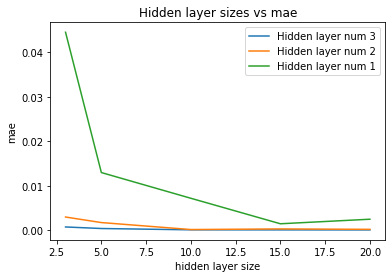

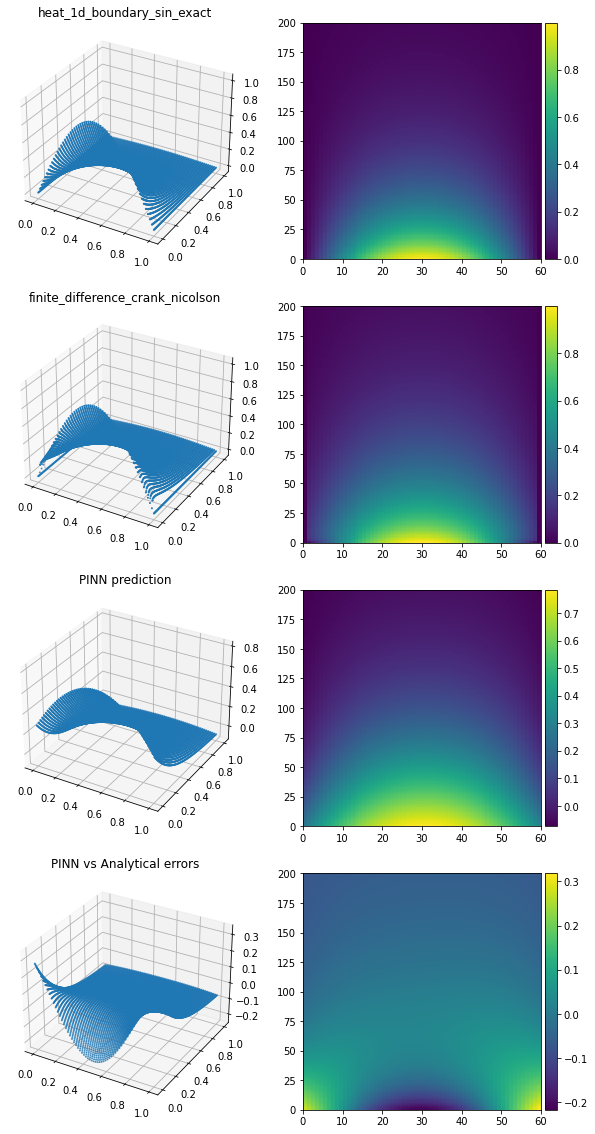

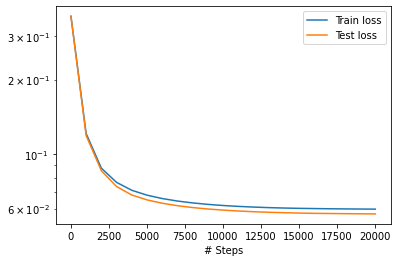

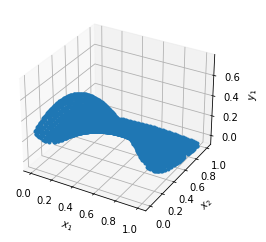

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.41599292
L2 relative error: 0.23310745982462378
--- Report ---
Mean absolute error:  0.04445963399818434
Mean squared error:  0.0034327978805306926
Max error:  0.3180468678474425
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 3
nn_hidden_layer_num: 1



In [13]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Hidden layer num" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("hidden layer size")
    ax.set_ylabel("mae")
    ax.title.set_text("Hidden layer sizes vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params = mae_dist_model[3])

# Test 2: Reduce train data (domain and bc) to break solution

In [10]:
num_domains = [2540, 100, 50, 10]
num_bcs = [100, 26, 10, 4]

# # Small test
# num_domains = [10]
# num_bcs = [10, 4]

plot_results = []
mae_dist_models = []
for num_domain in num_domains:
    num_bc_maes = []
    for num_bc in num_bcs:
        test_params = PinnTestParam()
        test_params.d_num_domain = int(num_domain)
        test_params.d_num_boundary = int(num_bc/2)
        test_params.d_num_initial = int(num_bc/2)
        geomtime_data, model = create_model(const_params, test_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, test_params])
        num_bc_maes.append(mae)
    plot_results.append([num_domain, num_bcs, num_bc_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.025605 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.234673 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.30e-02, 1.56e-02, 6.02e-01]    [6.12e-02, 1.56e-02, 6.02e-01]    []  
1000      [1.19e-03, 2.64e-04, 2.22e-04]    [8.27e-04, 2.64e-04, 2.22e-04]    []  
2000      [2.28e-04, 9.16e-06, 2.97e-05]    [1.60e-04, 9.16e-06, 2.97e-05]    []  
3000      [1.20e-04, 4.96e-06, 1.73e-05]    [8.54e-05, 4.96e-06, 1.73e-05]    []  
4000      [8.58e-05, 2.33e-06, 1.03e-05]    [6.07e-05, 2.33e-06, 1.03e-05]    []  
5000      [6.60e-05, 1.42e-06, 6.03e-06]    [4.61e-05, 1.42e-06, 6.03e-06]    []  
6000      [5.35e-05, 2.09e-06, 6.34e-06]    [3.58e-05, 2.09e-06, 6.34e-06]    []  
7000      [4.38e-05, 3.73e-06, 3.91e-06]    [3.26e-05, 3.73e-06, 3.91e-06]    []  
8000      [3.53e-05, 2.40e-06, 2.47e-06]    [2.65e-05, 2.40e-06, 2.47e-06]    []  
9000      [2.81e-05, 4.32e-07, 1.56e-06]    [2.05e-05, 4.32e-07, 1.56e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.242000 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.20e-02, 3.03e-02, 3.13e-01]    [4.27e-02, 3.03e-02, 3.13e-01]    []  
1000      [8.54e-04, 5.25e-04, 3.19e-04]    [5.81e-04, 5.25e-04, 3.19e-04]    []  
2000      [1.07e-04, 3.24e-05, 1.13e-05]    [5.68e-05, 3.24e-05, 1.13e-05]    []  
3000      [4.85e-05, 1.44e-05, 4.78e-06]    [2.95e-05, 1.44e-05, 4.78e-06]    []  
4000      [3.46e-05, 1.04e-05, 5.38e-06]    [2.35e-05, 1.04e-05, 5.38e-06]    []  
5000      [4.58e-05, 1.54e-05, 5.24e-06]    [3.68e-05, 1.54e-05, 5.24e-06]    []  
6000      [2.35e-05, 5.12e-06, 2.40e-06]    [1.71e-05, 5.12e-06, 2.40e-06]    []  
7000      [2.08e-05, 4.24e-06, 2.28e-06]    [1.55e-05, 4.24e-06, 2.28e-06]    []  
8000      [2.77e-05, 9.29e-06, 4.73e-06]    [2.28e-05, 9.29e-06, 4.73e-06]    []  
9000      [1.80e-05, 3.48e-06, 3.07e-06]    [1.41e-05, 3.48e-06, 3.07e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.259634 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.98e-02, 4.14e-02, 4.07e-01]    [3.00e-02, 4.14e-02, 4.07e-01]    []  
1000      [9.74e-04, 5.40e-04, 1.39e-03]    [7.55e-04, 5.40e-04, 1.39e-03]    []  
2000      [2.67e-04, 1.78e-05, 6.31e-05]    [2.29e-04, 1.78e-05, 6.31e-05]    []  
3000      [1.25e-04, 5.02e-06, 1.76e-05]    [1.10e-04, 5.02e-06, 1.76e-05]    []  
4000      [6.13e-05, 3.50e-06, 6.98e-06]    [5.45e-05, 3.50e-06, 6.98e-06]    []  
5000      [2.78e-05, 2.53e-06, 2.69e-06]    [2.44e-05, 2.53e-06, 2.69e-06]    []  
6000      [1.85e-05, 2.05e-06, 1.46e-06]    [1.63e-05, 2.05e-06, 1.46e-06]    []  
7000      [1.38e-05, 1.67e-06, 9.13e-07]    [1.23e-05, 1.67e-06, 9.13e-07]    []  
8000      [1.24e-05, 1.49e-06, 1.09e-06]    [1.10e-05, 1.49e-06, 1.09e-06]    []  
9000      [9.91e-06, 1.25e-06, 4.34e-07]    [8.76e-06, 1.25e-06, 4.34e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 18:00:28.633947: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices

'compile' took 0.303364 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.17e-02, 2.16e-02, 5.29e-01]    [6.18e-02, 2.16e-02, 5.29e-01]    []  
1000      [1.77e-04, 3.60e-05, 5.56e-05]    [1.49e-04, 3.60e-05, 5.56e-05]    []  
2000      [4.42e-05, 6.35e-08, 1.63e-07]    [3.92e-05, 6.35e-08, 1.63e-07]    []  
3000      [2.53e-05, 2.58e-08, 4.97e-08]    [2.25e-05, 2.58e-08, 4.97e-08]    []  
4000      [1.58e-05, 1.24e-08, 1.98e-08]    [1.41e-05, 1.24e-08, 1.98e-08]    []  
5000      [1.06e-05, 1.78e-08, 1.32e-08]    [9.59e-06, 1.78e-08, 1.32e-08]    []  
6000      [7.72e-06, 2.07e-09, 5.84e-09]    [7.00e-06, 2.07e-09, 5.84e-09]    []  
7000      [6.05e-06, 1.51e-09, 1.01e-08]    [5.51e-06, 1.51e-09, 1.01e-08]    []  
8000      [4.97e-06, 3.19e-10, 2.51e-09]    [4.52e-06, 3.19e-10, 2.51e-09]    []  
9000      [5.13e-06, 1.92e-05, 1.64e-05]    [4.87e-06, 1.92e-05, 1.64e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.290916 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.83e-01, 8.89e-02, 5.03e-01]    [2.63e-01, 8.89e-02, 5.03e-01]    []  
1000      [2.52e-03, 2.40e-03, 2.40e-03]    [1.87e-03, 2.40e-03, 2.40e-03]    []  
2000      [5.41e-04, 2.52e-04, 6.81e-05]    [7.40e-04, 2.52e-04, 6.81e-05]    []  
3000      [2.54e-04, 9.94e-05, 2.45e-05]    [4.56e-04, 9.94e-05, 2.45e-05]    []  
4000      [1.43e-04, 4.11e-05, 1.37e-05]    [2.74e-04, 4.11e-05, 1.37e-05]    []  
5000      [1.98e-04, 3.01e-05, 2.13e-05]    [2.29e-04, 3.01e-05, 2.13e-05]    []  
6000      [6.07e-05, 8.60e-06, 7.42e-06]    [1.22e-04, 8.60e-06, 7.42e-06]    []  
7000      [4.54e-05, 5.48e-06, 6.49e-06]    [9.00e-05, 5.48e-06, 6.49e-06]    []  
8000      [1.07e-04, 1.13e-05, 6.16e-06]    [9.19e-05, 1.13e-05, 6.16e-06]    []  
9000      [2.59e-05, 3.10e-06, 4.87e-06]    [5.25e-05, 3.10e-06, 4.87e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.309680 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.23e-02, 1.55e-01, 1.05e+00]    [1.92e-02, 1.55e-01, 1.05e+00]    []  
1000      [2.41e-03, 2.63e-03, 2.75e-03]    [2.15e-03, 2.63e-03, 2.75e-03]    []  
2000      [8.34e-04, 5.61e-04, 5.90e-05]    [1.14e-03, 5.61e-04, 5.90e-05]    []  
3000      [2.31e-04, 5.31e-05, 8.68e-06]    [3.34e-04, 5.31e-05, 8.68e-06]    []  
4000      [1.06e-04, 2.10e-05, 6.63e-06]    [1.57e-04, 2.10e-05, 6.63e-06]    []  
5000      [1.64e-04, 7.11e-05, 3.06e-05]    [1.62e-04, 7.11e-05, 3.06e-05]    []  
6000      [6.55e-05, 1.90e-05, 5.37e-06]    [9.54e-05, 1.90e-05, 5.37e-06]    []  
7000      [6.64e-05, 1.73e-05, 1.43e-05]    [8.96e-05, 1.73e-05, 1.43e-05]    []  
8000      [4.33e-05, 1.09e-05, 1.37e-06]    [7.08e-05, 1.09e-05, 1.37e-06]    []  
9000      [7.61e-05, 2.22e-05, 4.41e-05]    [8.68e-05, 2.22e-05, 4.41e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.315634 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.99e-02, 2.15e-02, 4.42e-01]    [6.05e-02, 2.15e-02, 4.42e-01]    []  
1000      [1.09e-03, 9.64e-05, 3.47e-03]    [1.28e-03, 9.64e-05, 3.47e-03]    []  
2000      [3.45e-04, 4.57e-06, 9.07e-05]    [4.32e-04, 4.57e-06, 9.07e-05]    []  
3000      [9.28e-05, 3.58e-07, 1.00e-05]    [1.41e-04, 3.58e-07, 1.00e-05]    []  
4000      [2.34e-05, 2.81e-07, 2.85e-06]    [4.46e-05, 2.81e-07, 2.85e-06]    []  
5000      [3.31e-05, 2.73e-05, 2.17e-05]    [4.73e-05, 2.73e-05, 2.17e-05]    []  
6000      [5.13e-06, 6.09e-07, 1.44e-06]    [1.52e-05, 6.09e-07, 1.44e-06]    []  
7000      [3.99e-06, 8.08e-07, 2.38e-06]    [1.30e-05, 8.08e-07, 2.38e-06]    []  
8000      [3.55e-06, 4.66e-07, 1.79e-06]    [1.18e-05, 4.66e-07, 1.79e-06]    []  
9000      [3.57e-06, 7.61e-07, 1.16e-06]    [1.14e-05, 7.61e-07, 1.16e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 18:02:13.869830: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, 

'compile' took 0.325305 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.98e-01, 7.69e-02, 4.23e-01]    [1.96e-01, 7.69e-02, 4.23e-01]    []  
1000      [1.73e-04, 1.58e-06, 3.01e-06]    [1.85e-04, 1.58e-06, 3.01e-06]    []  
2000      [5.77e-05, 7.09e-08, 4.40e-07]    [6.28e-05, 7.09e-08, 4.40e-07]    []  
3000      [3.16e-05, 4.40e-05, 4.10e-05]    [3.59e-05, 4.40e-05, 4.10e-05]    []  
4000      [1.84e-05, 4.48e-08, 2.23e-08]    [2.06e-05, 4.48e-08, 2.23e-08]    []  
5000      [1.32e-05, 1.22e-08, 1.84e-08]    [1.48e-05, 1.22e-08, 1.84e-08]    []  
6000      [1.03e-05, 5.73e-06, 3.60e-06]    [1.15e-05, 5.73e-06, 3.60e-06]    []  
7000      [8.33e-06, 7.34e-09, 1.25e-08]    [9.35e-06, 7.34e-09, 1.25e-08]    []  
8000      [6.74e-06, 4.73e-07, 5.99e-07]    [7.66e-06, 4.73e-07, 5.99e-07]    []  
9000      [5.44e-06, 2.10e-09, 6.31e-09]    [6.25e-06, 2.10e-09, 6.31e-09]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 18:02:28.535228: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.339861 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.39e-01, 3.03e-01, 2.06e-01]    [1.33e-01, 3.03e-01, 2.06e-01]    []  
1000      [1.49e-03, 5.85e-04, 7.16e-04]    [1.52e-03, 5.85e-04, 7.16e-04]    []  
2000      [2.85e-04, 6.40e-05, 6.19e-05]    [7.04e-04, 6.40e-05, 6.19e-05]    []  
3000      [1.63e-04, 3.32e-05, 3.65e-05]    [3.98e-04, 3.32e-05, 3.65e-05]    []  
4000      [1.01e-04, 1.69e-05, 2.02e-05]    [2.61e-04, 1.69e-05, 2.02e-05]    []  
5000      [3.45e-04, 2.65e-05, 2.71e-05]    [3.35e-04, 2.65e-05, 2.71e-05]    []  
6000      [5.20e-05, 5.84e-06, 6.62e-06]    [1.42e-04, 5.84e-06, 6.62e-06]    []  
7000      [4.55e-05, 3.89e-06, 4.07e-06]    [1.16e-04, 3.89e-06, 4.07e-06]    []  
8000      [3.54e-05, 2.98e-06, 2.47e-06]    [1.01e-04, 2.98e-06, 2.47e-06]    []  
9000      [1.47e-04, 6.44e-06, 9.72e-06]    [1.37e-04, 6.44e-06, 9.72e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.362575 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.38e-03, 5.88e-02, 8.99e-01]    [4.00e-03, 5.88e-02, 8.99e-01]    []  
1000      [1.84e-03, 1.59e-03, 5.83e-04]    [4.21e-03, 1.59e-03, 5.83e-04]    []  
2000      [4.83e-04, 6.31e-04, 6.04e-05]    [9.89e-04, 6.31e-04, 6.04e-05]    []  
3000      [1.18e-04, 8.08e-05, 1.52e-05]    [8.46e-04, 8.08e-05, 1.52e-05]    []  
4000      [7.33e-05, 1.36e-05, 8.84e-06]    [6.84e-04, 1.36e-05, 8.84e-06]    []  
5000      [4.99e-05, 6.21e-06, 5.03e-06]    [5.21e-04, 6.21e-06, 5.03e-06]    []  
6000      [3.65e-05, 5.46e-06, 3.63e-06]    [4.08e-04, 5.46e-06, 3.63e-06]    []  
7000      [2.77e-05, 2.83e-06, 3.06e-06]    [3.44e-04, 2.83e-06, 3.06e-06]    []  
8000      [2.19e-05, 2.71e-06, 1.78e-06]    [2.85e-04, 2.71e-06, 1.78e-06]    []  
9000      [1.77e-05, 2.31e-06, 1.33e-06]    [2.47e-04, 2.31e-06, 1.33e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.369977 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.84e-03, 5.51e-03, 3.97e-01]    [4.04e-03, 5.51e-03, 3.97e-01]    []  
1000      [5.69e-04, 4.01e-05, 5.72e-04]    [3.46e-02, 4.01e-05, 5.72e-04]    []  
2000      [2.07e-04, 1.13e-05, 1.17e-04]    [5.39e-02, 1.13e-05, 1.17e-04]    []  
3000      [8.30e-05, 3.31e-06, 7.66e-05]    [5.82e-02, 3.31e-06, 7.66e-05]    []  
4000      [3.47e-05, 1.10e-06, 4.91e-05]    [5.05e-02, 1.10e-06, 4.91e-05]    []  
5000      [1.71e-05, 1.80e-06, 2.76e-05]    [4.09e-02, 1.80e-06, 2.76e-05]    []  
6000      [1.91e-05, 3.87e-06, 1.75e-05]    [3.32e-02, 3.87e-06, 1.75e-05]    []  
7000      [7.01e-06, 2.10e-06, 1.17e-05]    [2.89e-02, 2.10e-06, 1.17e-05]    []  
8000      [9.94e-06, 2.55e-06, 1.11e-05]    [2.58e-02, 2.55e-06, 1.11e-05]    []  
9000      [5.14e-06, 1.79e-06, 6.73e-06]    [2.39e-02, 1.79e-06, 6.73e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 18:03:18.020984: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.378536 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.19e-01, 2.64e-01, 8.94e-01]    [4.14e-01, 2.64e-01, 8.94e-01]    []  
1000      [1.89e-03, 3.15e-04, 5.36e-04]    [5.93e-03, 3.15e-04, 5.36e-04]    []  
2000      [1.98e-04, 1.77e-06, 3.44e-06]    [1.24e-03, 1.77e-06, 3.44e-06]    []  
3000      [4.88e-05, 1.78e-07, 8.67e-07]    [5.36e-04, 1.78e-07, 8.67e-07]    []  
4000      [1.47e-05, 1.57e-08, 2.47e-08]    [2.83e-04, 1.57e-08, 2.47e-08]    []  
5000      [8.30e-06, 1.78e-09, 2.53e-09]    [2.03e-04, 1.78e-09, 2.53e-09]    []  
6000      [5.93e-06, 3.80e-10, 8.48e-10]    [1.72e-04, 3.80e-10, 8.48e-10]    []  
7000      [1.83e-05, 6.03e-05, 4.21e-05]    [1.50e-04, 6.03e-05, 4.21e-05]    []  
8000      [3.77e-06, 1.24e-06, 9.70e-07]    [1.48e-04, 1.24e-06, 9.70e-07]    []  
9000      [2.69e-06, 1.33e-09, 1.59e-10]    [1.35e-04, 1.33e-09, 1.59e-10]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.405970 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.69e-01, 7.59e-01, 1.53e-01]    [6.49e-01, 7.59e-01, 1.53e-01]    []  
1000      [3.32e-03, 2.86e-03, 4.79e-03]    [1.74e-02, 2.86e-03, 4.79e-03]    []  
2000      [5.62e-04, 3.43e-04, 2.84e-04]    [1.73e-02, 3.43e-04, 2.84e-04]    []  
3000      [3.83e-04, 1.23e-04, 1.39e-04]    [1.37e-02, 1.23e-04, 1.39e-04]    []  
4000      [2.67e-04, 6.17e-05, 7.10e-05]    [9.50e-03, 6.17e-05, 7.10e-05]    []  
5000      [1.81e-04, 2.65e-05, 3.70e-05]    [6.43e-03, 2.65e-05, 3.70e-05]    []  
6000      [2.20e-03, 9.57e-05, 1.88e-04]    [7.22e-03, 9.57e-05, 1.88e-04]    []  
7000      [7.82e-05, 5.47e-06, 1.11e-05]    [3.39e-03, 5.47e-06, 1.11e-05]    []  
8000      [5.46e-05, 4.79e-06, 6.97e-06]    [2.77e-03, 4.79e-06, 6.97e-06]    []  
9000      [3.65e-05, 4.21e-06, 4.44e-06]    [2.36e-03, 4.21e-06, 4.44e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.430931 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.07e-02, 1.28e-01, 9.25e-01]    [3.20e-02, 1.28e-01, 9.25e-01]    []  
1000      [1.95e-03, 2.84e-03, 2.67e-03]    [7.47e-03, 2.84e-03, 2.67e-03]    []  
2000      [7.68e-04, 2.32e-04, 1.22e-04]    [2.67e-02, 2.32e-04, 1.22e-04]    []  
3000      [1.24e-04, 7.12e-05, 6.38e-05]    [2.19e-02, 7.12e-05, 6.38e-05]    []  
4000      [1.02e-04, 3.75e-05, 3.67e-05]    [2.00e-02, 3.75e-05, 3.67e-05]    []  
5000      [8.04e-05, 2.59e-05, 2.57e-05]    [1.87e-02, 2.59e-05, 2.57e-05]    []  
6000      [6.78e-05, 2.09e-05, 2.01e-05]    [1.76e-02, 2.09e-05, 2.01e-05]    []  
7000      [1.97e-04, 2.14e-05, 1.81e-05]    [1.61e-02, 2.14e-05, 1.81e-05]    []  
8000      [1.52e-03, 7.85e-05, 2.36e-05]    [2.05e-02, 7.85e-05, 2.36e-05]    []  
9000      [3.13e-05, 1.29e-05, 1.21e-05]    [1.63e-02, 1.29e-05, 1.21e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.453468 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.51e-02, 2.90e-01, 2.70e-01]    [5.65e-02, 2.90e-01, 2.70e-01]    []  
1000      [1.82e-03, 3.26e-03, 7.76e-03]    [7.22e-03, 3.26e-03, 7.76e-03]    []  
2000      [3.47e-04, 5.60e-06, 3.41e-05]    [2.23e-02, 5.60e-06, 3.41e-05]    []  
3000      [1.09e-04, 2.17e-06, 2.75e-06]    [1.45e-02, 2.17e-06, 2.75e-06]    []  
4000      [4.92e-05, 1.64e-06, 3.83e-06]    [1.23e-02, 1.64e-06, 3.83e-06]    []  
5000      [2.36e-05, 9.06e-07, 5.70e-06]    [1.18e-02, 9.06e-07, 5.70e-06]    []  
6000      [1.07e-05, 6.85e-07, 6.52e-06]    [1.17e-02, 6.85e-07, 6.52e-06]    []  
7000      [1.96e-04, 2.15e-05, 6.81e-06]    [1.13e-02, 2.15e-05, 6.81e-06]    []  
8000      [2.93e-06, 5.75e-07, 5.95e-06]    [1.13e-02, 5.75e-07, 5.95e-06]    []  
9000      [1.76e-06, 4.86e-07, 5.18e-06]    [1.11e-02, 4.86e-07, 5.18e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 18:04:25.078706: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.521086 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.47e-01, 3.99e-02, 6.25e-01]    [3.53e-01, 3.99e-02, 6.25e-01]    []  
1000      [4.19e-05, 4.02e-08, 1.57e-07]    [1.22e-03, 4.02e-08, 1.57e-07]    []  
2000      [1.12e-05, 6.39e-09, 1.41e-08]    [8.25e-04, 6.39e-09, 1.41e-08]    []  
3000      [4.39e-06, 2.51e-09, 2.06e-09]    [5.93e-04, 2.51e-09, 2.06e-09]    []  
4000      [1.81e-06, 1.02e-09, 4.66e-09]    [4.99e-04, 1.02e-09, 4.66e-09]    []  
5000      [7.30e-07, 1.82e-09, 6.08e-10]    [4.62e-04, 1.82e-09, 6.08e-10]    []  
6000      [3.18e-07, 2.07e-09, 1.10e-09]    [4.52e-04, 2.07e-09, 1.10e-09]    []  
7000      [1.69e-07, 7.12e-09, 5.18e-09]    [4.53e-04, 7.12e-09, 5.18e-09]    []  
8000      [1.22e-07, 1.35e-08, 1.67e-08]    [4.62e-04, 1.35e-08, 1.67e-08]    []  
9000      [3.12e-06, 9.00e-06, 7.46e-06]    [4.69e-04, 9.00e-06, 7.46e-06]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20062     [9.59e-08, 5.40e-14, 6.70e-13]    [6.21e-04, 5.40e-14, 6.70e-13]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 1
  Number of functions evaluations: 18
20080     [9.59e-08, 5.40e-14, 6.70e-13]    [6.21e-04, 5.40e-14, 6.70e-13]    []  

Best model at step 20062:
  train loss: 9.59e-08
  test loss: 6.21e-04
  test metric: []

'train' took 2.096395 s

PINN prediction: Average time with 25 tries: 0.0336 seconds


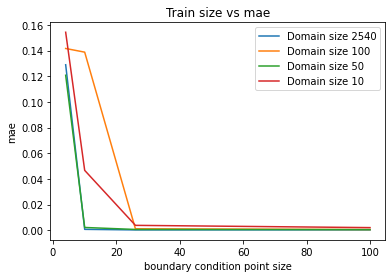

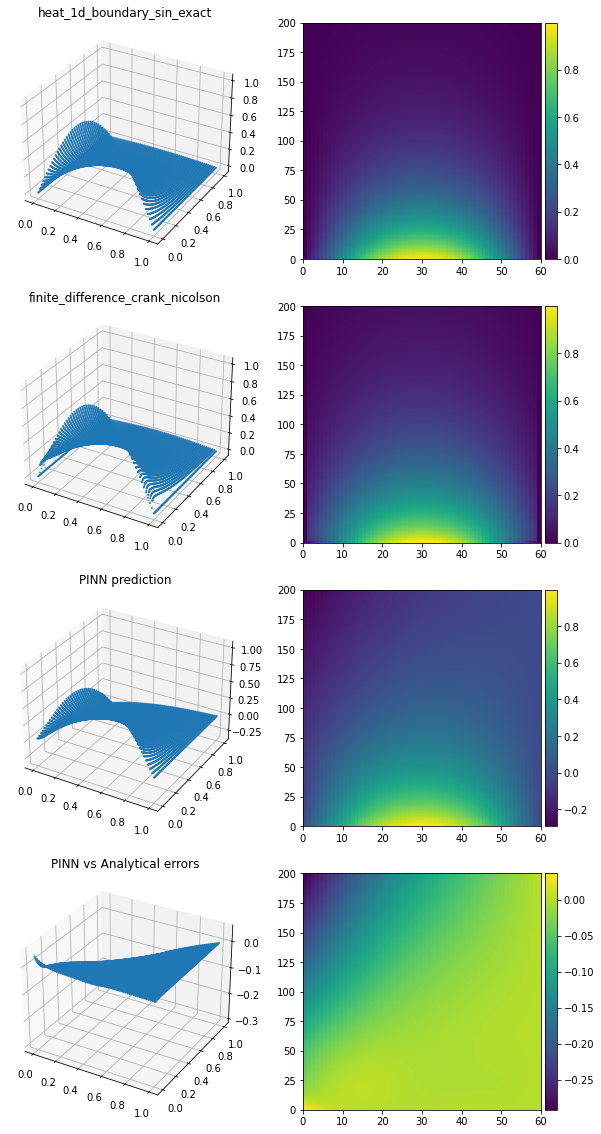

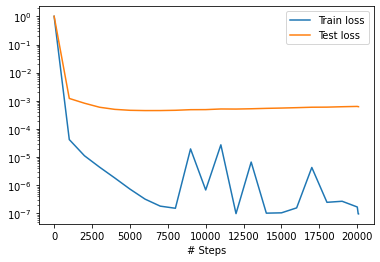

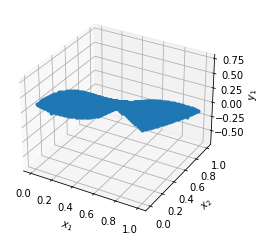

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.39743066
L2 relative error: 0.30422573967066974
--- Report ---
Mean absolute error:  0.046626617739515874
Mean squared error:  0.005846928741648105
Max error:  0.2919086217880249
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Test Param: 
d_num_domain: 10
d_num_boundary: 5
d_num_initial: 5
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [11]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Domain size" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("boundary condition point size")
    ax.set_ylabel("mae")
    ax.title.set_text("Train size vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    predict_and_output_report(const_params, mae_dist_model[2], *model.train(), test_params=mae_dist_model[3])
